In [106]:
import os
import duckdb
import pandas as pd

# this works with MIMIC-III demo 
# https://physionet.org/content/mimiciii-demo/1.4/

# If you want to persist the database, uncomment the following line and set the path instead of in memory
# you may need to do this if you are working with large data or don't have enough RAM
# db_path = './data/db/mimic.db'
db_path = ':memory:'
extract_dir = './data/mimic-demo'
con = duckdb.connect(db_path)


In [ ]:
patients_csv = os.path.join(extract_dir, 'PATIENTS.csv')
con.execute(f"""
    CREATE VIEW patients AS
    SELECT * FROM read_csv_auto('{patients_csv}', HEADER=TRUE, SAMPLE_SIZE=-1)
""")

In [ ]:
tables = con.execute("SHOW TABLES").fetchdf()
print(tables)

In [ ]:
query = """
SELECT * FROM PATIENTS
"""
pdf = con.execute(query).fetchdf()
display(pdf.head())

In [107]:
def detect_date_columns(sample_df):
    date_cols = []
    for col in sample_df.columns:
        try:
            parsed = pd.to_datetime(sample_df[col], errors='coerce')
            non_null = parsed.notnull().sum()
            if non_null / len(parsed) > 0.8:  # at least 80% parsable
                date_cols.append(col)
        except Exception:
            continue
    return date_cols

for file_name in os.listdir(extract_dir):
    if file_name.endswith('.csv'):
        file_path = os.path.join(extract_dir, file_name)
        table_name = os.path.splitext(file_name)[0]

        try:
            sample = pd.read_csv(file_path, nrows=100)
            date_cols = detect_date_columns(sample)

            # Load full CSV parsing detected date columns
            df = pd.read_csv(file_path, parse_dates=date_cols)
            
            # Register and write to DuckDB
            con.register('df_view', df)
            con.execute(f"CREATE OR REPLACE TABLE {table_name} AS SELECT * FROM df_view")
            print(f"Loaded: {table_name} (dates: {date_cols})")
        except Exception as e:
            print(f"Failed to load {file_name}: {e}")

/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjf

Loaded: PROCEDUREEVENTS_MV (dates: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'starttime', 'endtime', 'itemid', 'value', 'storetime', 'cgid', 'orderid', 'linkorderid', 'isopenbag', 'continueinnextdept', 'cancelreason'])
Loaded: CALLOUT (dates: ['row_id', 'subject_id', 'hadm_id', 'submit_wardid', 'curr_wardid', 'callout_wardid', 'request_tele', 'request_resp', 'request_cdiff', 'request_mrsa', 'request_vre', 'discharge_wardid', 'createtime', 'updatetime', 'acknowledgetime', 'outcometime'])
Loaded: D_CPT (dates: ['row_id', 'category', 'mincodeinsubsection', 'maxcodeinsubsection'])
Loaded: D_ITEMS (dates: ['row_id', 'itemid'])
Loaded: CAREGIVERS (dates: ['row_id', 'cgid'])
Loaded: MICROBIOLOGYEVENTS (dates: ['row_id', 'subject_id', 'hadm_id', 'chartdate', 'charttime', 'spec_itemid'])
Loaded: LABEVENTS (dates: ['row_id', 'subject_id', 'itemid', 'charttime'])


/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/494343534.py:23: DtypeWarning: Columns (17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=date_cols)
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/494343534.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=date_cols)
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/494343534.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=date_cols)
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/494343534.py:23: UserWarning: Could not infer format, s

Loaded: INPUTEVENTS_CV (dates: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'charttime', 'itemid', 'amount', 'storetime', 'cgid', 'orderid', 'linkorderid'])
Loaded: ADMISSIONS (dates: ['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime', 'hospital_expire_flag', 'has_chartevents_data'])
Loaded: D_LABITEMS (dates: ['row_id', 'itemid'])
Loaded: DATETIMEEVENTS (dates: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'itemid', 'charttime', 'storetime', 'cgid', 'value'])
Loaded: PRESCRIPTIONS (dates: ['row_id', 'subject_id', 'hadm_id', 'startdate', 'enddate', 'gsn', 'ndc'])
Loaded: PROCEDURES_ICD (dates: ['row_id', 'subject_id', 'hadm_id', 'seq_num', 'icd9_code'])
Loaded: NOTEEVENTS (dates: [])


/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/494343534.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=date_cols)
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/494343534.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=date_cols)
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/494343534.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=date_cols)
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr000

Loaded: CHARTEVENTS (dates: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'itemid', 'charttime', 'storetime', 'cgid', 'value', 'valuenum', 'warning', 'error'])
Loaded: TRANSFERS (dates: ['row_id', 'subject_id', 'hadm_id', 'intime'])
Loaded: DIAGNOSES_ICD (dates: ['row_id', 'subject_id', 'hadm_id', 'seq_num'])
Loaded: SERVICES (dates: ['row_id', 'subject_id', 'hadm_id', 'transfertime'])
Loaded: DRGCODES (dates: ['row_id', 'subject_id', 'hadm_id', 'drg_code'])
Loaded: OUTPUTEVENTS (dates: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'charttime', 'itemid', 'value', 'storetime', 'cgid'])
Loaded: PATIENTS (dates: ['row_id', 'subject_id', 'dob', 'dod', 'expire_flag'])
Loaded: D_ICD_DIAGNOSES (dates: ['row_id', 'icd9_code'])
Loaded: ICUSTAYS (dates: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'first_wardid', 'last_wardid', 'intime', 'outtime', 'los'])


/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjf

Loaded: INPUTEVENTS_MV (dates: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'starttime', 'endtime', 'itemid', 'amount', 'storetime', 'cgid', 'orderid', 'linkorderid', 'patientweight', 'isopenbag', 'continueinnextdept', 'cancelreason', 'originalamount', 'originalrate'])
Loaded: D_ICD_PROCEDURES (dates: ['row_id', 'icd9_code'])
Loaded: CPTEVENTS (dates: ['row_id', 'subject_id', 'hadm_id', 'cpt_cd', 'cpt_number', 'ticket_id_seq'])


/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/494343534.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(sample_df[col], errors='coerce')
/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/494343534.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path, parse_dates=date_cols)
/var/folders/rj/p9v68y5j0zjfffhw8

In [108]:
tables = con.execute("SHOW TABLES").fetchdf()
print(tables)

                  name
0           ADMISSIONS
1              CALLOUT
2           CAREGIVERS
3          CHARTEVENTS
4            CPTEVENTS
5       DATETIMEEVENTS
6        DIAGNOSES_ICD
7             DRGCODES
8                D_CPT
9      D_ICD_DIAGNOSES
10    D_ICD_PROCEDURES
11             D_ITEMS
12          D_LABITEMS
13            ICUSTAYS
14      INPUTEVENTS_CV
15      INPUTEVENTS_MV
16           LABEVENTS
17  MICROBIOLOGYEVENTS
18          NOTEEVENTS
19        OUTPUTEVENTS
20            PATIENTS
21       PRESCRIPTIONS
22  PROCEDUREEVENTS_MV
23      PROCEDURES_ICD
24            SERVICES
25           TRANSFERS
26             df_view


In [109]:
query = """
SELECT * FROM PATIENTS
"""
pdf = con.execute(query).fetchdf()
display(pdf.head())

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05,2165-08-12,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05,2126-08-28,2126-08-28 00:00:00,None,1
2,9474,10013,F,2038-09-03,2125-10-07,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21,2152-09-12,None,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20,2163-05-15,2163-05-15 00:00:00,2163-05-15 00:00:00,1


In [110]:
display(pdf['dod'].isna().sum())
display(pdf['dod'].notna().sum())




np.int64(0)

np.int64(100)

#### From: https://mimic.mit.edu/docs/iii/tables/patients/

DOD is the date of death for the given patient. DOD_HOSP is the date of death as recorded in the hospital database. DOD_SSN is the date of death from the social security database. Note that DOD merged together DOD_HOSP and DOD_SSN, giving priority to DOD_HOSP if both were recorded.



In [111]:
display(pdf['dod_hosp'].isna().sum())
display(pdf['dod_hosp'].notna().sum())

display(pdf['dod_ssn'].isna().sum())
display(pdf['dod_ssn'].notna().sum())


np.int64(30)

np.int64(70)

np.int64(23)

np.int64(77)

## Let's look at the number of admissions per patient

In [112]:
query = """
SELECT * FROM PATIENTS p
JOIN ADMISSIONS a ON p.SUBJECT_ID = a.SUBJECT_ID
"""
patient_admission_df = con.execute(query).fetchdf()
patient_admission_df

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,row_id_1,subject_id_1,...,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,9467,10006,F,2094-03-05,2165-08-12,2165-08-12 00:00:00,2165-08-12 00:00:00,1,12258,10006,...,Medicare,None,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,9472,10011,F,2090-06-05,2126-08-28,2126-08-28 00:00:00,None,1,12263,10011,...,Private,None,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,None,None,HEPATITIS B,1,1
2,9474,10013,F,2038-09-03,2125-10-07,2125-10-07 00:00:00,2125-10-07 00:00:00,1,12265,10013,...,Medicare,None,CATHOLIC,None,UNKNOWN/NOT SPECIFIED,None,None,SEPSIS,1,1
3,9478,10017,F,2075-09-21,2152-09-12,None,2152-09-12 00:00:00,1,12269,10017,...,Medicare,None,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,9479,10019,M,2114-06-20,2163-05-15,2163-05-15 00:00:00,2163-05-15 00:00:00,1,12270,10019,...,Medicare,None,CATHOLIC,DIVORCED,WHITE,None,None,ALCOHOLIC HEPATITIS,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,9539,10083,F,2110-03-25,2192-12-12,None,2192-12-12 00:00:00,1,12332,10083,...,Medicare,None,CATHOLIC,MARRIED,WHITE,2192-11-19 21:06:00,2192-11-20 05:43:00,HYPOTENSION,0,1
125,9579,10124,F,2108-12-20,2192-05-15,2192-05-15 00:00:00,2192-05-15 00:00:00,1,12377,10124,...,Medicare,RUSS,JEWISH,WIDOWED,WHITE,2192-03-26 10:58:00,2192-03-26 16:48:00,LEFT HIP FRACTURE,0,1
126,9579,10124,F,2108-12-20,2192-05-15,2192-05-15 00:00:00,2192-05-15 00:00:00,1,12378,10124,...,Medicare,RUSS,JEWISH,WIDOWED,WHITE,2192-04-16 11:51:00,2192-04-16 21:38:00,CONGESTIVE HEART FAILURE,1,1
127,30873,40304,M,2086-12-16,2165-01-17,2165-01-17 00:00:00,2165-01-17 00:00:00,1,39866,40304,...,Medicare,ENGL,PROTESTANT QUAKER,MARRIED,WHITE,None,None,MEDIASTINAL ADENOPATHY,0,1


In [113]:
patient_admission_df.groupby('subject_id').agg({'hadm_id': 'count'}).value_counts()

hadm_id
1          86
2          11
3           2
15          1
Name: count, dtype: int64

### another way to do the same thing

In [114]:
query = """
SELECT COUNT(DISTINCT(p.subject_id)) as UniqueSubjects, COUNT(DISTINCT(a.hadm_id)) as UniqueAdmissionIds FROM PATIENTS p
JOIN ADMISSIONS a ON p.SUBJECT_ID = a.SUBJECT_ID
"""
patient_admission_df = con.execute(query).fetchdf()
patient_admission_df

,UniqueSubjects,UniqueAdmissionIds
0,100,129


In [115]:
query = """
SELECT admission_count, COUNT(*) AS num_patients
FROM (
    SELECT p.subject_id, COUNT(hadm_id) AS admission_count
    FROM patients p
    JOIN admissions a ON p.subject_id = a.subject_id
    GROUP BY p.subject_id
)
GROUP BY admission_count
ORDER BY admission_count;
"""
patient_admission_df = con.execute(query).fetchdf()
patient_admission_df

,admission_count,num_patients
0,1,86
1,2,11
2,3,2
3,15,1


In [116]:
# Load tables
patients_df = con.execute("SELECT * FROM patients").fetchdf()
admissions_df = con.execute("SELECT * FROM admissions").fetchdf()

# Ensure subject_id is the same type (e.g., int)
patients_df['subject_id'] = patients_df['subject_id'].astype(int)
admissions_df['subject_id'] = admissions_df['subject_id'].astype(int)

# Merge on subject_id
patient_admission_df = patients_df.merge(admissions_df, on='subject_id')

# Count admissions per patient
admission_counts = patient_admission_df.groupby('subject_id')['hadm_id'].count()

# Frequency of those counts
admission_distribution = admission_counts.value_counts().sort_index()

admission_distribution


hadm_id
1     86
2     11
3      2
15     1
Name: count, dtype: int64

In [117]:
%%time
query = """
SELECT * FROM PATIENTS p
JOIN ADMISSIONS a ON p.SUBJECT_ID = a.SUBJECT_ID
"""
patient_admission_df = con.execute(query).fetchdf()
patient_admission_df.groupby('subject_id').agg({'hadm_id': 'count'}).value_counts()

CPU times: user 5.23 ms, sys: 1.95 ms, total: 7.17 ms
Wall time: 4.72 ms


hadm_id
1          86
2          11
3           2
15          1
Name: count, dtype: int64

In [118]:
%%time
query = """
SELECT admission_count, COUNT(*) AS num_patients
FROM (
    SELECT p.subject_id, COUNT(hadm_id) AS admission_count
    FROM patients p
    JOIN admissions a ON p.subject_id = a.subject_id
    GROUP BY p.subject_id
)
GROUP BY admission_count
ORDER BY admission_count;
"""
patient_admission_df = con.execute(query).fetchdf()
patient_admission_df

CPU times: user 9.81 ms, sys: 6.78 ms, total: 16.6 ms
Wall time: 4.91 ms


,admission_count,num_patients
0,1,86
1,2,11
2,3,2
3,15,1


In [119]:
%%time 
# Load tables
patients_df = con.execute("SELECT * FROM patients").fetchdf()
admissions_df = con.execute("SELECT * FROM admissions").fetchdf()

# Ensure subject_id is the same type (e.g., int)
patients_df['subject_id'] = patients_df['subject_id'].astype(int)
admissions_df['subject_id'] = admissions_df['subject_id'].astype(int)

# Merge on subject_id
patient_admission_df = patients_df.merge(admissions_df, on='subject_id')

# Count admissions per patient
admission_counts = patient_admission_df.groupby('subject_id')['hadm_id'].count()

# Frequency of those counts
admission_distribution = admission_counts.value_counts().sort_index()

admission_distribution


CPU times: user 6 ms, sys: 1.86 ms, total: 7.86 ms
Wall time: 5.58 ms


hadm_id
1     86
2     11
3      2
15     1
Name: count, dtype: int64

In [121]:
# Calculate age at death
query = """ SELECT *, date_diff('day', dob, dod) / 365.25 AS AgeAtDeath FROM PATIENTS """ 

patient_df = con.execute(query).fetchdf()
patient_df


,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,AgeAtDeath
0,9467,10006,F,2094-03-05,2165-08-12,2165-08-12 00:00:00,2165-08-12 00:00:00,1,71.436003
1,9472,10011,F,2090-06-05,2126-08-28,2126-08-28 00:00:00,None,1,36.227242
2,9474,10013,F,2038-09-03,2125-10-07,2125-10-07 00:00:00,2125-10-07 00:00:00,1,87.091034
3,9478,10017,F,2075-09-21,2152-09-12,None,2152-09-12 00:00:00,1,76.974675
4,9479,10019,M,2114-06-20,2163-05-15,2163-05-15 00:00:00,2163-05-15 00:00:00,1,48.900753
5,9486,10026,F,1895-05-17,2195-11-24,None,2195-11-24 00:00:00,1,300.517454
6,9487,10027,F,2108-01-15,2190-09-14,None,2190-09-14 00:00:00,1,82.663929
7,9489,10029,M,2061-04-10,2140-09-21,None,2140-09-21 00:00:00,1,79.446954
8,9491,10032,M,2050-03-29,2138-05-21,2138-05-21 00:00:00,2138-05-21 00:00:00,1,88.142368
9,9492,10033,F,2051-04-21,2133-09-09,None,2133-09-09 00:00:00,1,82.384668


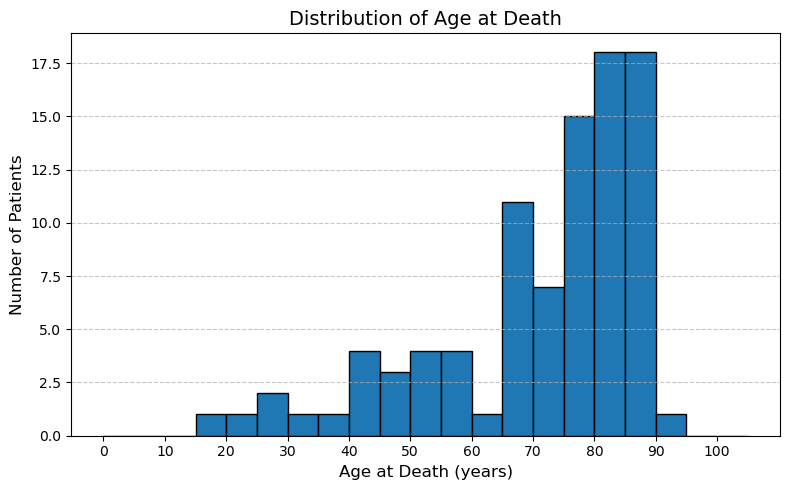

In [122]:
import matplotlib.pyplot as plt

# Drop NaNs just in case (patients not deceased)
age_at_death = patient_df['AgeAtDeath'].dropna()

# Plot
plt.figure(figsize=(8, 5))
plt.hist(age_at_death, bins=range(0, 110, 5), edgecolor='black')

# Styling
plt.title("Distribution of Age at Death", fontsize=14)
plt.xlabel("Age at Death (years)", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.xticks(range(0, 110, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

query = """
SELECT hadm_id, subject_id,
       DATE_DIFF('day', admittime, dischtime) AS length_of_stay
FROM admissions
WHERE dischtime IS NOT NULL AND admittime IS NOT NULL
"""

los_df = con.execute(query).fetchdf()


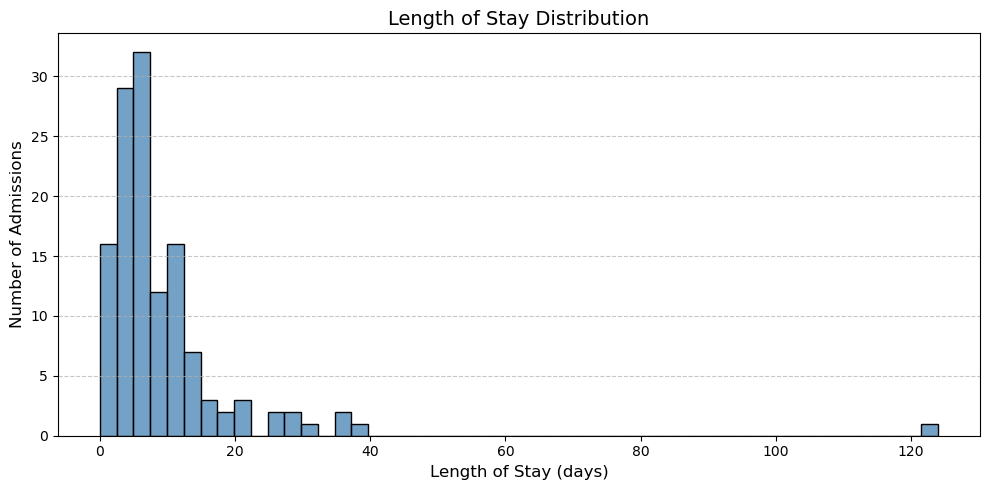

In [124]:
plt.figure(figsize=(10, 5))
sns.histplot(data=los_df, x='length_of_stay', bins=50, kde=False, color='steelblue')

# Styling
plt.title("Length of Stay Distribution", fontsize=14)
plt.xlabel("Length of Stay (days)", fontsize=12)
plt.ylabel("Number of Admissions", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### ICU vs. Overall Admission 

In [125]:
query = """
SELECT subject_id, hadm_id, icustay_id,
       EXTRACT(EPOCH FROM outtime - intime) / 60.0 / 60.0 / 24.0 AS icu_length_of_stay
FROM icustays
WHERE intime IS NOT NULL AND outtime IS NOT NULL
"""

icu_los_df = con.execute(query).fetchdf()

display(icu_los_df.shape)
display(icu_los_df.head())


(136, 4)

,subject_id,hadm_id,icustay_id,icu_length_of_stay
0,10006,142345,206504,1.632546
1,10011,105331,232110,13.850694
2,10013,165520,264446,2.649907
3,10017,199207,204881,2.143611
4,10019,177759,228977,1.293843


In [127]:
icu_los_df.groupby('hadm_id').agg({'icu_length_of_stay': 'sum'}).describe()

,icu_length_of_stay
count,129.000000
mean,4.694068
std,6.485318
min,0.105926
25%,1.293843
50%,2.255949
75%,4.617928
max,35.406516


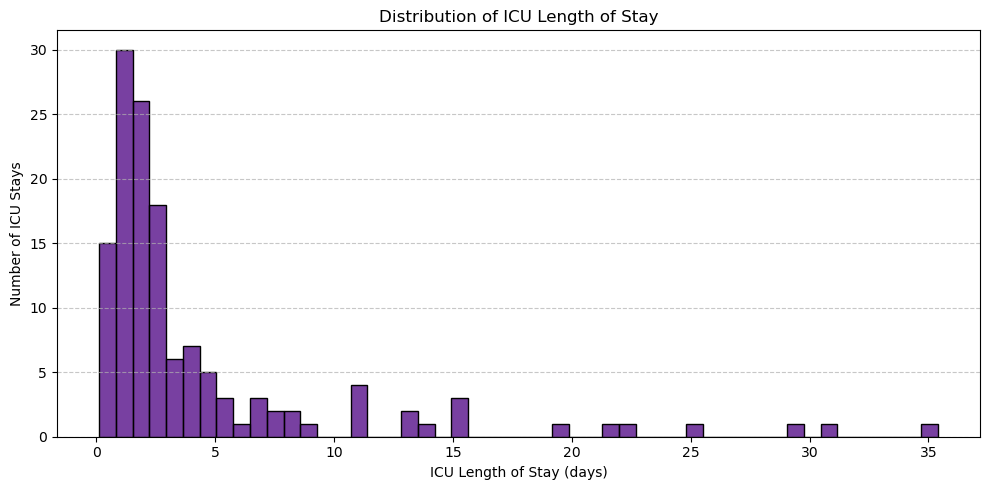

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(data=icu_los_df, x='icu_length_of_stay', bins=50, color='indigo')

plt.title("Distribution of ICU Length of Stay")
plt.xlabel("ICU Length of Stay (days)")
plt.ylabel("Number of ICU Stays")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [128]:
print('Admission')
display(los_df['length_of_stay'].describe())

print('ICU')
display(icu_los_df['icu_length_of_stay'].describe())



Admission


count    129.000000
mean       9.341085
std       12.686420
min        0.000000
25%        3.000000
50%        6.000000
75%       11.000000
max      124.000000
Name: length_of_stay, dtype: float64

ICU


count    136.000000
mean       4.452461
std        6.196832
min        0.105926
25%        1.233504
50%        2.111447
75%        4.329063
max       35.406516
Name: icu_length_of_stay, dtype: float64

### if predicting long length of stay, we need to be careful about censoring! 

In [129]:
query = """
SELECT subject_id, hadm_id,
       DATE_DIFF('day', admittime, dischtime) AS admission_los
FROM admissions
WHERE hospital_expire_flag = 0
  AND admittime IS NOT NULL
  AND dischtime IS NOT NULL
"""
survivor_los_df = con.execute(query).fetchdf()

display(survivor_los_df.shape)
display(survivor_los_df.head())
display(survivor_los_df.describe())



(89, 3)

,subject_id,hadm_id,admission_los
0,10006,142345,9
1,10017,199207,8
2,10026,103770,7
3,10027,199395,12
4,10029,132349,10


,admission_los
count,89.000000
mean,9.696629
std,13.923822
min,1.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,124.000000


In [130]:
# All admissions
all_los_query = """
SELECT subject_id, hadm_id,
       DATE_DIFF('day', admittime, dischtime) AS los,
       hospital_expire_flag
FROM admissions
WHERE admittime IS NOT NULL AND dischtime IS NOT NULL
"""
all_los_df = con.execute(all_los_query).fetchdf()
display(all_los_df.shape)
display(all_los_df[all_los_df['hospital_expire_flag'] == 0].shape)
display(all_los_df[all_los_df['hospital_expire_flag'] == 1].shape)



(129, 4)

(0, 4)

(0, 4)

(129, 4)

(89, 4)

(40, 4)

(89, 4)

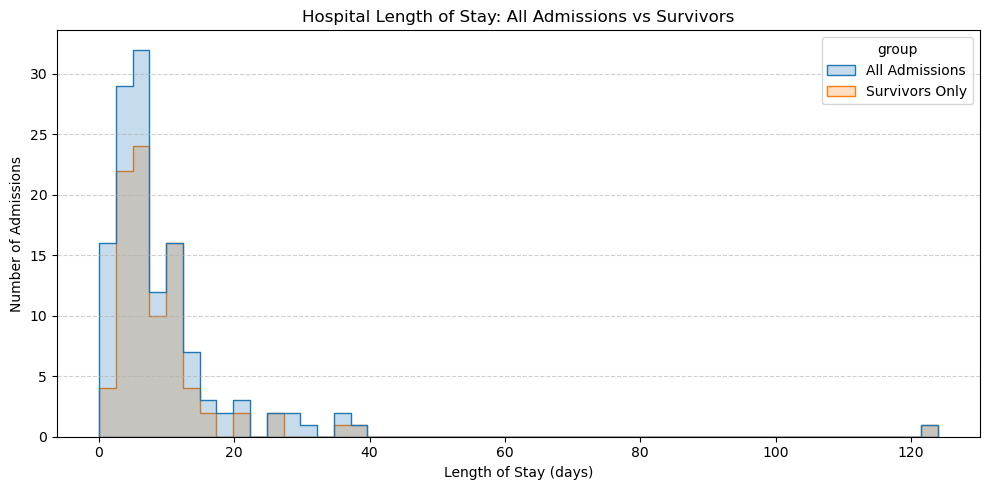

In [131]:
display(all_los_df.shape)
all_los_df['hospital_expire_flag']= all_los_df['hospital_expire_flag'].astype('int')
display(all_los_df[all_los_df['hospital_expire_flag'] == 0].shape)
display(all_los_df[all_los_df['hospital_expire_flag'] == 1].shape)

# Split into survivors and full set
survivor_los_df = all_los_df[all_los_df['hospital_expire_flag'] == 0].copy()
display(survivor_los_df.shape)

# Filter and label both groups
all_los_df['group'] = 'All Admissions'
survivor_los_df['group'] = 'Survivors Only'

# Combine
combined_los_df = pd.concat([all_los_df, survivor_los_df], axis=0)

plt.figure(figsize=(10, 5))
sns.histplot(data=combined_los_df, x='los', bins=50, hue='group', element='step', stat='count', common_norm=False)

# Styling
plt.title("Hospital Length of Stay: All Admissions vs Survivors")
plt.xlabel("Length of Stay (days)")
plt.ylabel("Number of Admissions")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [132]:
query = """
WITH co AS
(
SELECT subject_id, hadm_id, icustay_id
, EXTRACT(EPOCH FROM outtime - intime)/60.0/60.0/24.0 as icu_length_of_stay
FROM icustays
)
SELECT
  co.subject_id, co.hadm_id, co.icustay_id, co.icu_length_of_stay
FROM co
WHERE icu_length_of_stay >= 2
"""
icu_2_days_df = pd.read_sql_query(query, con)
display(icu_2_days_df.shape)
display(icu_2_days_df)

/var/folders/rj/p9v68y5j0zjfffhw8x57q4nr0000gp/T/ipykernel_27163/240977312.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  icu_2_days_df = pd.read_sql_query(query, con)


(73, 4)

,subject_id,hadm_id,icustay_id,icu_length_of_stay
0,10011,105331,232110,13.850694
1,10013,165520,264446,2.649907
2,10017,199207,204881,2.143611
3,10026,103770,277021,2.405637
4,10027,199395,286020,7.261551
5,10029,132349,226055,2.262431
6,10032,140372,267090,3.711991
7,10038,111115,235482,3.385683
8,10040,157839,272047,2.130613
9,10042,148562,258147,8.141481


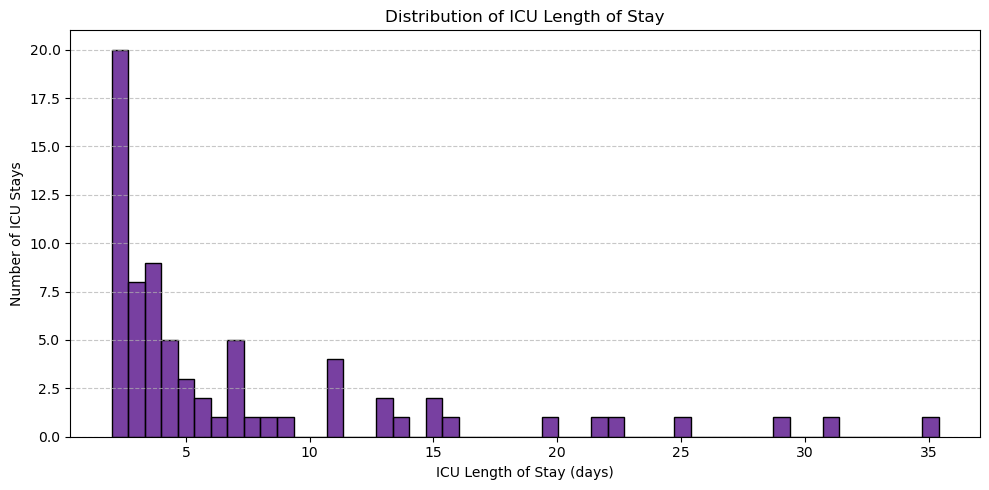

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(data=icu_2_days_df, x='icu_length_of_stay', bins=50, color='indigo')

plt.title("Distribution of ICU Length of Stay")
plt.xlabel("ICU Length of Stay (days)")
plt.ylabel("Number of ICU Stays")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Chartevents 

In [134]:
query = """SELECT * FROM chartevents LIMIT 100"""
ce_df = con.execute(query).fetchdf()
ce_df

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,5279021,40124,126179,279554,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0,0,None,None
1,5279022,40124,126179,279554,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,2222221.7,cmH2O,0,0,None,None
2,5279023,40124,126179,279554,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15,15,insp/min,0,0,None,None
3,5279024,40124,126179,279554,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94,94,bpm,0,0,None,None
4,5279025,40124,126179,279554,220179,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,163,163,mmHg,0,0,None,None
5,5279026,40124,126179,279554,220180,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,81,81,mmHg,0,0,None,None
6,5279027,40124,126179,279554,220181,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,101,101,mmHg,0,0,None,None
7,5279028,40124,126179,279554,220046,2130-02-04 04:34:00,2130-02-04 04:34:00,19085,120,120,bpm,0,0,None,None
8,5279029,40124,126179,279554,220047,2130-02-04 04:34:00,2130-02-04 04:34:00,19085,50,50,bpm,0,0,None,None
9,5279030,40124,126179,279554,223751,2130-02-04 04:34:00,2130-02-04 04:34:00,19085,170,170,mmHg,0,0,None,None


### how many patients have a chart event? 

In [135]:
query = """SELECT COUNT(DISTINCT(subject_id)) FROM chartevents"""
ce_df = con.execute(query).fetchdf()
display(ce_df)


,count(DISTINCT subject_id)
0,99


In [136]:
query = """SELECT DISTINCT(subject_id) as unique_subject_id FROM chartevents"""
ce_df = con.execute(query).fetchdf()
display(ce_df['unique_subject_id'].shape)

(99,)

In [138]:
query = """
SELECT * FROM PATIENTS p
WHERE CAST(p.subject_id as INT) NOT IN (SELECT DISTINCT(CAST(subject_id as INT)) FROM chartevents)
"""
missing_ce_df = con.execute(query).fetchdf()
display(missing_ce_df.shape)
display(missing_ce_df.head())

(1, 8)

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9575,10120,M,2088-05-05,2115-05-15,2115-05-15 00:00:00,None,1


In [139]:
query = """SELECT * FROM ADMISSIONS a WHERE subject_id = '10120'"""
admissions_df = con.execute(query).fetchdf()
display(admissions_df.shape)
display(admissions_df.head())

query = """SELECT * FROM ICUSTAYS i WHERE subject_id = '10120'"""
icu_stays_df = con.execute(query).fetchdf()
display(icu_stays_df.shape)
display(icu_stays_df.head())

(1, 19)

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12373,10120,193924,2115-05-12 14:52:00,2115-05-15 02:15:00,2115-05-15 02:15:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicaid,None,OTHER,SINGLE,UNKNOWN/NOT SPECIFIED,None,None,LIVER FAILURE,1,0


(1, 12)

,row_id,subject_id,hadm_id,icustay_id,dbsource,first_careunit,last_careunit,first_wardid,last_wardid,intime,outtime,los
0,12859,10120,193924,268282,carevue,MICU,SICU,23,57,2115-05-12 14:53:52,2115-05-15 06:24:50,2.6465


In [140]:
query = """SELECT * FROM CHARTEVENTS c WHERE subject_id = '10120'"""
chartevents_df = con.execute(query).fetchdf()
display(chartevents_df.shape)
display(chartevents_df.head())


(0, 15)

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped


In [141]:
query = """SELECT * FROM CHARTEVENTS c WHERE hadm_id = '193924'"""
chartevents_df = con.execute(query).fetchdf()
display(chartevents_df.shape)
display(chartevents_df.head())

query = """SELECT * FROM CHARTEVENTS c WHERE icustay_id = '268282'"""
chartevents_df = con.execute(query).fetchdf()
display(chartevents_df.shape)
display(chartevents_df.head())


(0, 15)

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped


(0, 15)

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped


In [142]:
query = """SELECT * FROM LABEVENTS l WHERE hadm_id = '193924'"""
labevents_df = con.execute(query).fetchdf()
display(labevents_df.shape)
display(labevents_df.head())


(559, 9)

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
0,6294066,10120,193924.0,50861,2115-05-12 14:08:00,6956,6956.0,IU/L,abnormal
1,6294067,10120,193924.0,50862,2115-05-12 14:08:00,2.9,2.9,g/dL,abnormal
2,6294068,10120,193924.0,50863,2115-05-12 14:08:00,167,167.0,IU/L,abnormal
3,6294069,10120,193924.0,50867,2115-05-12 14:08:00,438,438.0,IU/L,abnormal
4,6294070,10120,193924.0,50868,2115-05-12 14:08:00,34,34.0,mEq/L,abnormal


# Let's look at chartevent stats: 

In [143]:
query = """
SELECT itemid,
       COUNT(*) AS total_records,
       COUNT(DISTINCT subject_id) AS num_patients
FROM chartevents
GROUP BY itemid
ORDER BY total_records DESC
LIMIT 100
"""

chartevent_stats_df = con.execute(query).fetchdf()
chartevent_stats_df


,itemid,total_records,num_patients
0,220045,8094,50
1,220210,8056,50
2,220277,8053,50
3,220048,7414,49
4,211,7396,48
5,742,7349,48
6,646,7262,48
7,212,7095,48
8,618,7030,48
9,128,6967,47


In [144]:
query = """SELECT * FROM d_items LIMIT 100"""
d_items_df = con.execute(query).fetchdf()
d_items_df

,row_id,itemid,label,abbreviation,dbsource,linksto,category,unitname,param_type,conceptid
0,1,1435,Sustained Nystamus,None,carevue,chartevents,None,None,None,NaN
1,2,1436,Tactile Disturbances,None,carevue,chartevents,None,None,None,NaN
2,3,1437,Tremor,None,carevue,chartevents,None,None,None,NaN
3,4,1438,Ulnar Pulse [Right],None,carevue,chartevents,None,None,None,NaN
4,5,1439,Visual Disturbances,None,carevue,chartevents,None,None,None,NaN
5,6,1447,Transpulmonary Pres,None,carevue,chartevents,None,None,None,NaN
6,7,1448,Vd/Vt:,None,carevue,chartevents,None,None,None,NaN
7,8,1449,Arterial BP(Rad),None,carevue,chartevents,None,None,None,NaN
8,9,1450,level one,None,carevue,chartevents,None,None,None,NaN
9,10,1451,L girth size,None,carevue,chartevents,None,None,None,NaN


In [ ]:
pd.set_option('display.max_rows', 100)

In [145]:
query = """
SELECT 
    ce.itemid,
    di.label,
    di.category,
    COUNT(*) AS total_records,
    COUNT(DISTINCT ce.subject_id) AS num_patients
FROM chartevents ce
JOIN d_items di ON ce.itemid = di.itemid
GROUP BY ce.itemid, di.label, di.category
ORDER BY total_records DESC
LIMIT 100
"""

chart_stats_df = con.execute(query).fetchdf()
display(chart_stats_df)


,itemid,label,category,total_records,num_patients
0,220045,Heart Rate,Routine Vital Signs,8094,50
1,220210,Respiratory Rate,Respiratory,8056,50
2,220277,O2 saturation pulseoxymetry,Respiratory,8053,50
3,220048,Heart Rhythm,Routine Vital Signs,7414,49
4,211,Heart Rate,None,7396,48
5,742,calprevflg,None,7349,48
6,646,SpO2,None,7262,48
7,212,Heart Rhythm,None,7095,48
8,618,Respiratory Rate,None,7030,48
9,128,Code Status,None,6967,47


In [146]:
query = """
SELECT 
    ce.itemid,
    di.label,
    di.category,
    di.dbsource,
    COUNT(*) AS total_records,
    COUNT(DISTINCT ce.subject_id) AS num_patients
FROM chartevents ce
JOIN d_items di ON ce.itemid = di.itemid
GROUP BY ce.itemid, di.label, di.category, di.dbsource
ORDER BY total_records DESC
LIMIT 100
"""

chart_stats_df = con.execute(query).fetchdf()
display(chart_stats_df)


,itemid,label,category,dbsource,total_records,num_patients
0,220045,Heart Rate,Routine Vital Signs,metavision,8094,50
1,220210,Respiratory Rate,Respiratory,metavision,8056,50
2,220277,O2 saturation pulseoxymetry,Respiratory,metavision,8053,50
3,220048,Heart Rhythm,Routine Vital Signs,metavision,7414,49
4,211,Heart Rate,None,carevue,7396,48
5,742,calprevflg,None,carevue,7349,48
6,646,SpO2,None,carevue,7262,48
7,212,Heart Rhythm,None,carevue,7095,48
8,618,Respiratory Rate,None,carevue,7030,48
9,128,Code Status,None,carevue,6967,47
